In [3]:
import random 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class k_arm_bandit:
    def __init__(self,k,eps):
        self.reward=[1]*10 #赌博机的平均收益值
        self.steps=0
        self.k=k
        
        self.average_reward=[0]*k #当前轮次的每个动作的平均收益
        self.oper_nums=[0]*k #当前轮次每个动作的操作次数
        self.eps=eps        
        
        self.all_average_reward=[] #当前轮次的平均收益
        self.all_reward=0
        self.right_operations=[] #当前轮次正确操作的概率
        self.right_operations_number=0
    
    def get_action(self):
        x=random.random()
        if x<self.eps:
            return random.randint(0,self.k-1)
        else:
            max_operation=[]
            max_value=max(self.average_reward)
            for i in range(len(self.average_reward)):
                if self.average_reward[i]==max_value:
                    max_operation.append(i)
            return random.choice(max_operation)
        
    def get_reward(self,oper_id):
        return self.reward[oper_id]+np.random.standard_normal()
    
    def update_average(self):
        for i in range(10):
            self.reward[i]+=np.random.normal(loc=0,scale=0.01)
        A=self.get_action()
        R=self.get_reward(A)
        
        right_oper=np.argmax(self.reward)
        self.oper_nums[A]+=1
        self.average_reward[A]=self.average_reward[A]+1.0/self.oper_nums[A]*(R-self.average_reward[A])
        
       
        self.steps+=1
        self.all_reward+=R
        if A==right_oper:
            self.right_operations_number+=1
        self.all_average_reward.append(self.all_reward/self.steps)
        self.right_operations.append(self.right_operations_number/self.steps)
        
    def update_fixed_alpha(self,alpha=0.1):
        for i in range(10):
            self.reward[i]+=np.random.normal(loc=0,scale=0.01)
        A=self.get_action()
        R=self.get_reward(A)
        
        right_oper=np.argmax(self.reward)
        self.oper_nums[A]+=1
        self.average_reward[A]=self.average_reward[A]+alpha*(R-self.average_reward[A])
        
       
        self.steps+=1
        self.all_reward+=R
        if A==right_oper:
            self.right_operations_number+=1
        self.all_average_reward.append(self.all_reward/self.steps)
        self.right_operations.append(self.right_operations_number/self.steps)

In [5]:
class average:
    def __init__(self):
        self.all_reward=[0]*50000
        self.all_right_oper=[0]*50000
        self.iter_num=500
    
    def wk(self):
        for iteration in range(self.iter_num):
            bandit=k_arm_bandit(10,0.1)
            for steps in range(50000):
                bandit.update_average()
            for i in range(50000):
                self.all_reward[i]+=bandit.all_average_reward[i]
                self.all_right_oper[i]+=bandit.right_operations[i]
            if iteration%10==9:
                print("iter {} done".format(iteration+1))
        for i in range(50000):
            self.all_reward[i]/=self.iter_num
            self.all_right_oper[i]/=self.iter_num
            self.all_right_oper[i]*=100

In [6]:
class fixed_alpha:
    def __init__(self):
        self.all_reward=[0]*50000
        self.all_right_oper=[0]*50000
        self.iter_num=500
    
    def wk(self):
        for iteration in range(self.iter_num):
            bandit=k_arm_bandit(10,0.1)
            for steps in range(50000):
                bandit.update_fixed_alpha()
            for i in range(50000):
                self.all_reward[i]+=bandit.all_average_reward[i]
                self.all_right_oper[i]+=bandit.right_operations[i]
            if iteration%10==9:
                print("iter {} done".format(iteration+1))
        for i in range(50000):
            self.all_reward[i]/=self.iter_num
            self.all_right_oper[i]/=self.iter_num
            self.all_right_oper[i]*=100

In [7]:
g1=average()
g1.wk()

iter 10 done
iter 20 done
iter 30 done
iter 40 done
iter 50 done
iter 60 done
iter 70 done
iter 80 done
iter 90 done
iter 100 done
iter 110 done
iter 120 done
iter 130 done
iter 140 done
iter 150 done
iter 160 done
iter 170 done
iter 180 done
iter 190 done
iter 200 done
iter 210 done
iter 220 done
iter 230 done
iter 240 done
iter 250 done
iter 260 done
iter 270 done
iter 280 done
iter 290 done
iter 300 done
iter 310 done
iter 320 done
iter 330 done
iter 340 done
iter 350 done
iter 360 done
iter 370 done
iter 380 done
iter 390 done
iter 400 done
iter 410 done
iter 420 done
iter 430 done
iter 440 done
iter 450 done
iter 460 done
iter 470 done
iter 480 done
iter 490 done
iter 500 done


In [8]:
g2=fixed_alpha()
g2.wk()

iter 10 done
iter 20 done
iter 30 done
iter 40 done
iter 50 done
iter 60 done
iter 70 done
iter 80 done
iter 90 done
iter 100 done
iter 110 done
iter 120 done
iter 130 done
iter 140 done
iter 150 done
iter 160 done
iter 170 done
iter 180 done
iter 190 done
iter 200 done
iter 210 done
iter 220 done
iter 230 done
iter 240 done
iter 250 done
iter 260 done
iter 270 done
iter 280 done
iter 290 done
iter 300 done
iter 310 done
iter 320 done
iter 330 done
iter 340 done
iter 350 done
iter 360 done
iter 370 done
iter 380 done
iter 390 done
iter 400 done
iter 410 done
iter 420 done
iter 430 done
iter 440 done
iter 450 done
iter 460 done
iter 470 done
iter 480 done
iter 490 done
iter 500 done


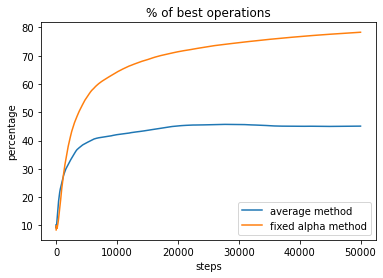

In [9]:
x=[]
for i in range(1,50001):
    x.append(i)
    
plt.plot(x,g1.all_right_oper,label='average method')
plt.plot(x,g2.all_right_oper,label='fixed alpha method')
plt.xlabel('steps')
plt.ylabel('percentage')
plt.title("% of best operations")
plt.legend()

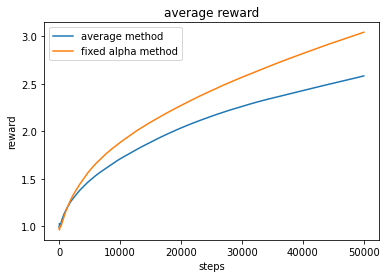

In [10]:
plt.plot(x,g1.all_reward,label='average method')
plt.plot(x,g2.all_reward,label='fixed alpha method')
plt.xlabel('steps')
plt.ylabel('reward')
plt.title("average reward")
plt.legend()